In [5]:
# This file is associated with the book
# "Machine Learning Refined", Cambridge University Press, 2016.
# by Jeremy Watt, Reza Borhani, and Aggelos Katsaggelos.

import matplotlib.pyplot as plt
import numpy as np

A simple data loading function.

In [6]:
# load the data
def load_data():
    # load data
    data = np.matrix(np.genfromtxt('exp_vs_log_data.csv', delimiter=','))
    X = np.asarray(data[:,0:2])
    y = np.asarray(data[:,2])
    y.shape = (np.size(y),1)
    return X, y

Gradient descent functions for both the softmax cost function and exponential cost.

In [7]:
# run gradient descent for h1
def gradient_descent_soft_cost(X,y,w,alpha):
    # start gradient descent loop
    H = np.dot(np.diag(y[:,0]),X.T)
    max_its = 10000

    for k in range(max_its):
        # compute gradient
        temp = 1/(1 + np.exp(np.dot(H,w)))
        grad = - np.dot(H.T,temp)

        # take gradient step
        w = w - alpha*grad
    return w

# run gradient descent for h2
def gradient_descent_exp_cost(X,y,w,alpha):
    # start gradient descent loop
    H = np.dot(np.diag(y[:,0]),X.T)
    max_its = 10000

    for k in range(max_its):
        # compute gradient
        temp = np.exp(np.dot(-H,w))
        grad = - np.dot(H.T,temp)

        # take gradient step
        w = w - alpha*grad
    return w

Now - a plotting function to show the datapoints and learned separators.

In [24]:
# plotting functions
def plot_all(X,y,w,color,ax1):
    # initialize figure, plot data, and dress up panels with axes labels etc.,

    plt.xlabel('$x_1$',fontsize=20,labelpad = 20)
    plt.ylabel('$x_2$',fontsize=20,rotation = 0,labelpad = 20)
    s = np.argwhere(y == 1)
    s = s[:,0]
    plt.scatter(X[s,0],X[s,1], s = 30,color = (1, 0, 0.4))
    s = np.argwhere(y == -1)
    s = s[:,0]
    plt.scatter(X[s,0],X[s,1],s = 30, color = (0, 0.4, 1))
    plt.xlim(0.2,1)
    plt.ylim(0.2,1)

    # plot separator
    r = np.linspace(0,1,150)
    z = -w.item(0)/w.item(2) - w.item(1)/w.item(2)*r
    plt.plot(r,z,color = color,linewidth = 2)
    plt.axis('off')
    plt.legend(['softmax cost', 'exponential cost'],loc='center left',bbox_to_anchor=(1, 0.5))

With everything defined we can now run all.

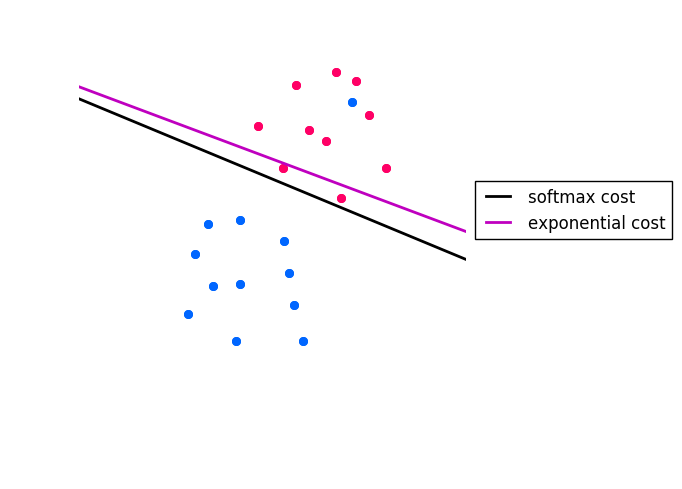

In [26]:
# load data
X,y = load_data()

# use compact notation and initialize
temp = np.shape(X)
temp = np.ones((temp[0],1))
X_tilde = np.concatenate((temp,X),1)
X_tilde = X_tilde.T

alpha = 10**(-2)
w0 = np.random.randn(3,1)

# run gradient descent for h1
w1 = gradient_descent_soft_cost(X_tilde,y,w0,alpha)

# run gradient descent for h1
w2 = gradient_descent_exp_cost(X_tilde,y,w0,alpha)

# plot everything
fig = plt.figure(figsize = (5,5))
plot_all(X,y,w1,'k',ax1)
plot_all(X,y,w2,'m',ax1)
plt.show()